In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk
from scipy.io import wavfile
from scipy import signal



1. úkol

Vzorkovací frekvence: 16000
Počet vzorků:  43111
Délka signálu: 2.6944375
Minimální hodnota:  -5830
Maximální hodnota:  8807


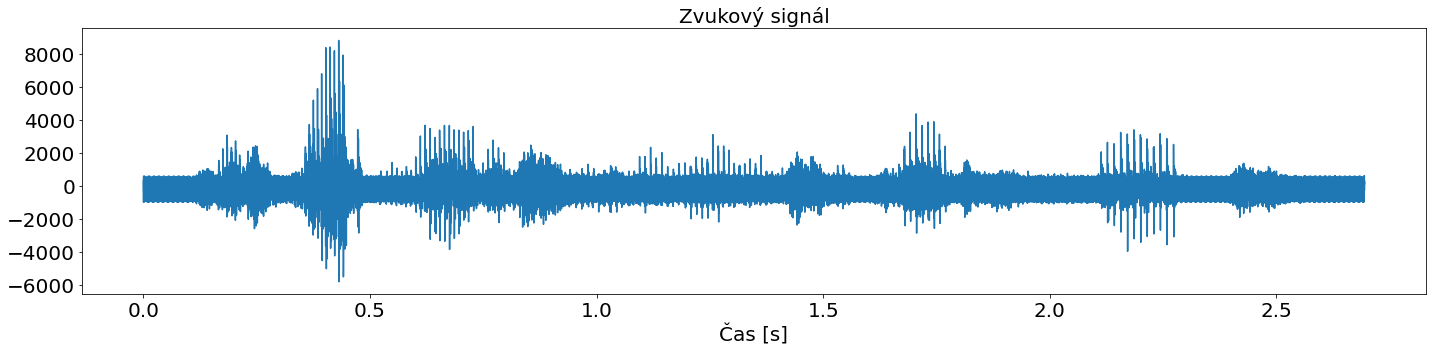

In [2]:
fs, s = wavfile.read("xvinto00.wav")
print("Vzorkovací frekvence:", fs)
print("Počet vzorků: ",s.size)
t = np.arange(s.size)/fs
print("Délka signálu:", s.size/fs)
print("Minimální hodnota: ", s.min())
print("Maximální hodnota: ", s.max())

plt.figure(figsize=(20,5))
plt.plot(t, s)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().set_xlabel('Čas [s]', fontsize=20)
plt.gca().set_title('Zvukový signál', fontsize=20)

plt.tight_layout()

2. úkol

C:\Users\NEGJO\AppData\Local\Temp/ipykernel_17548/4073343383.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,5))


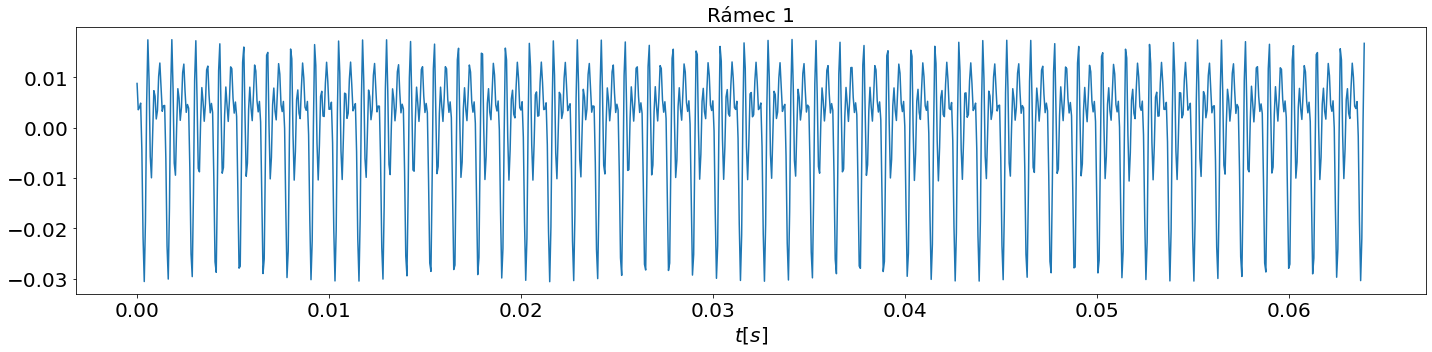

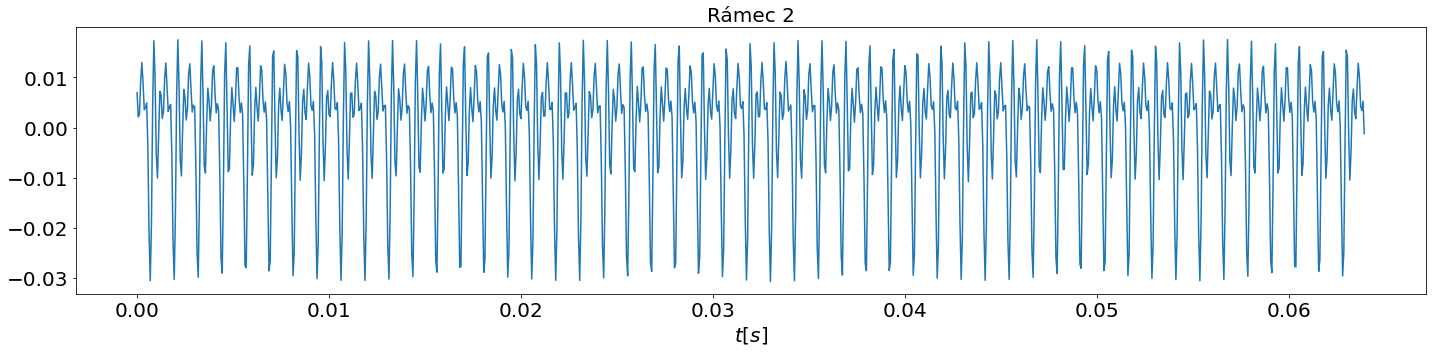

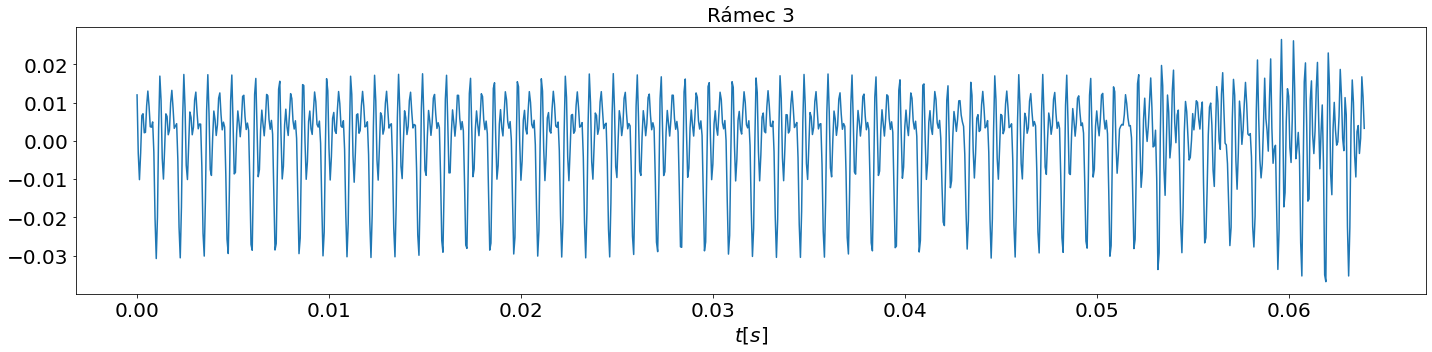

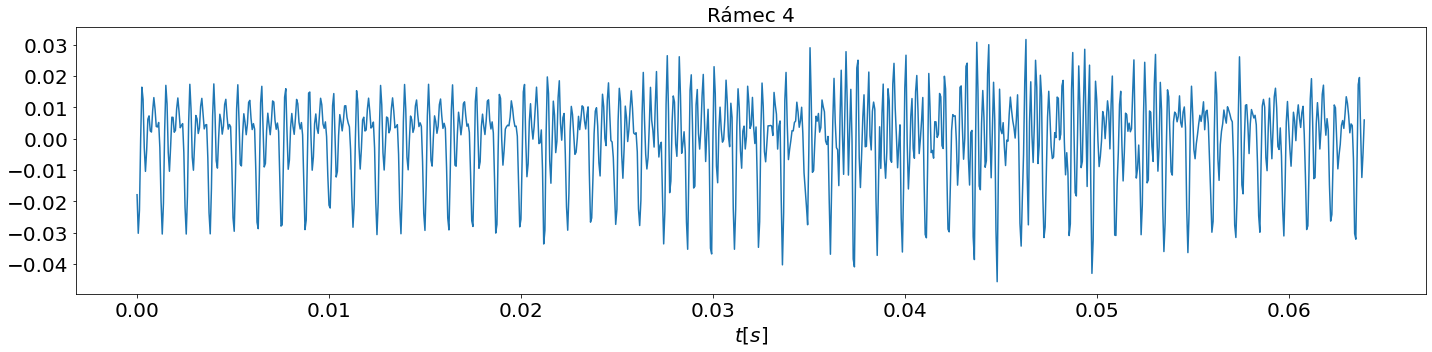

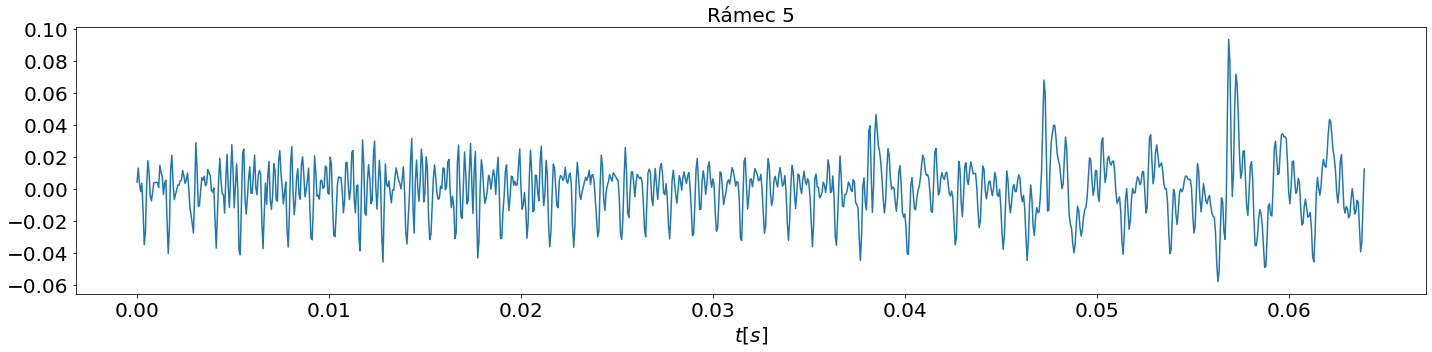

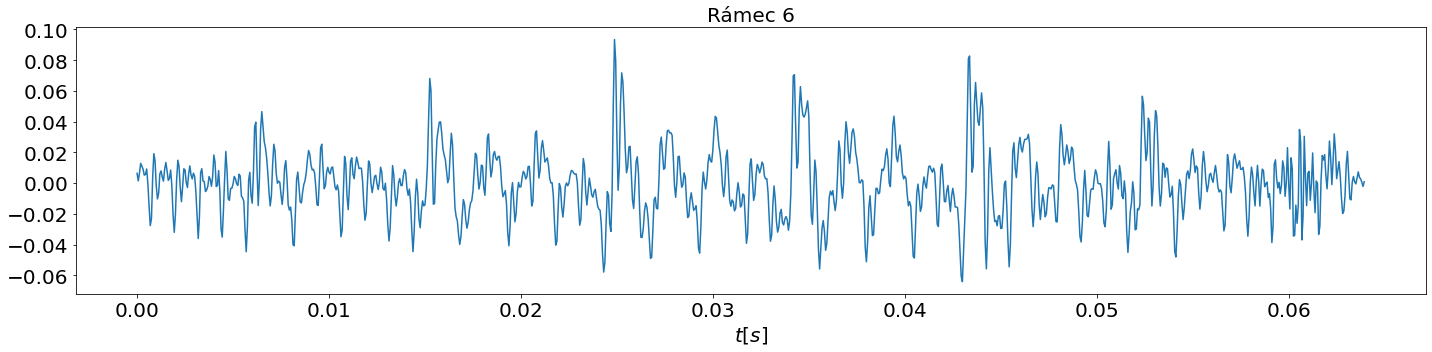

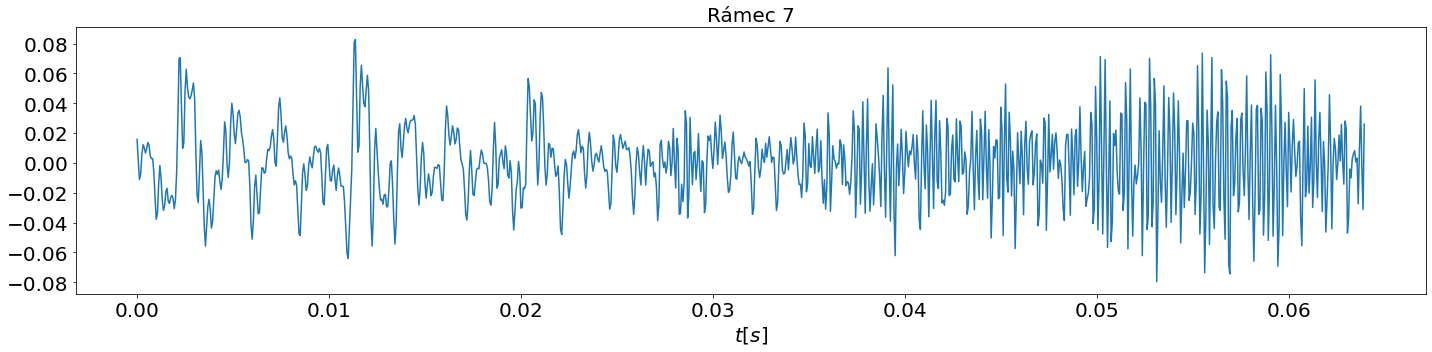

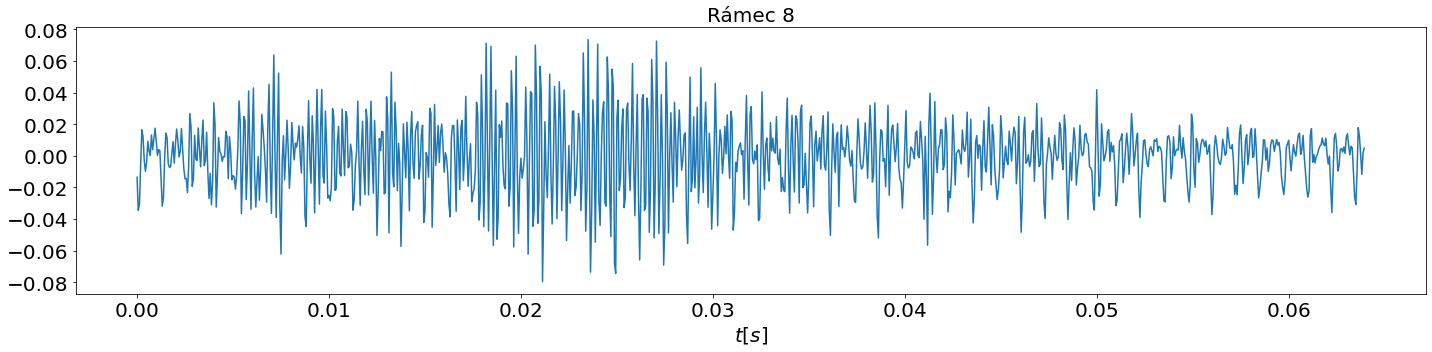

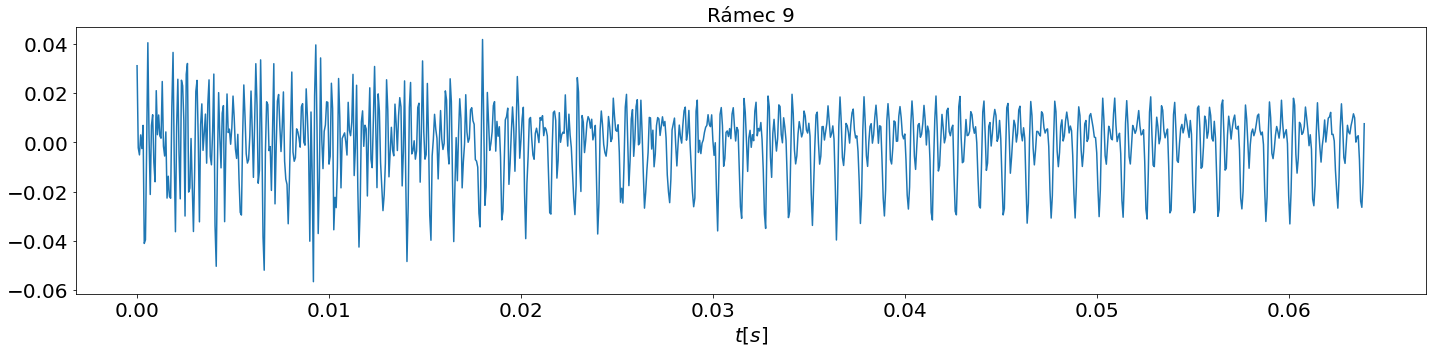

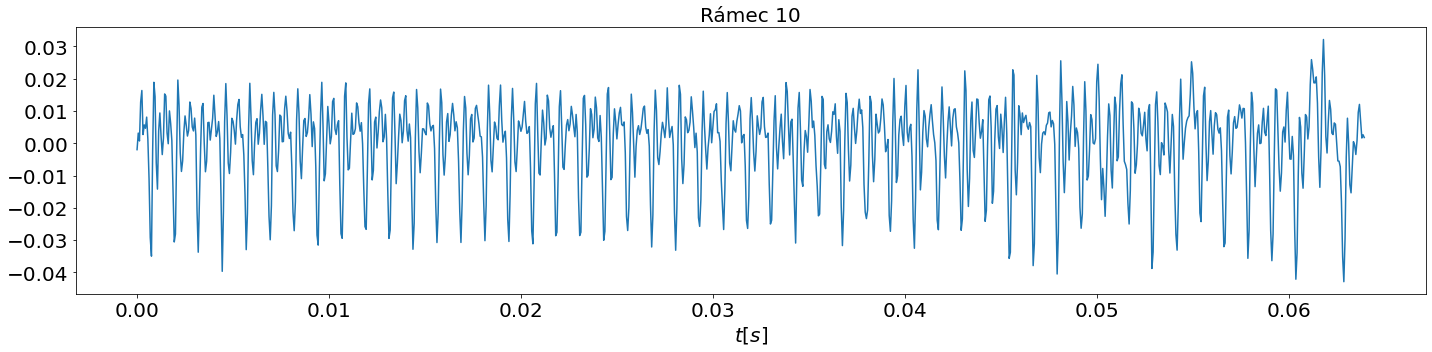

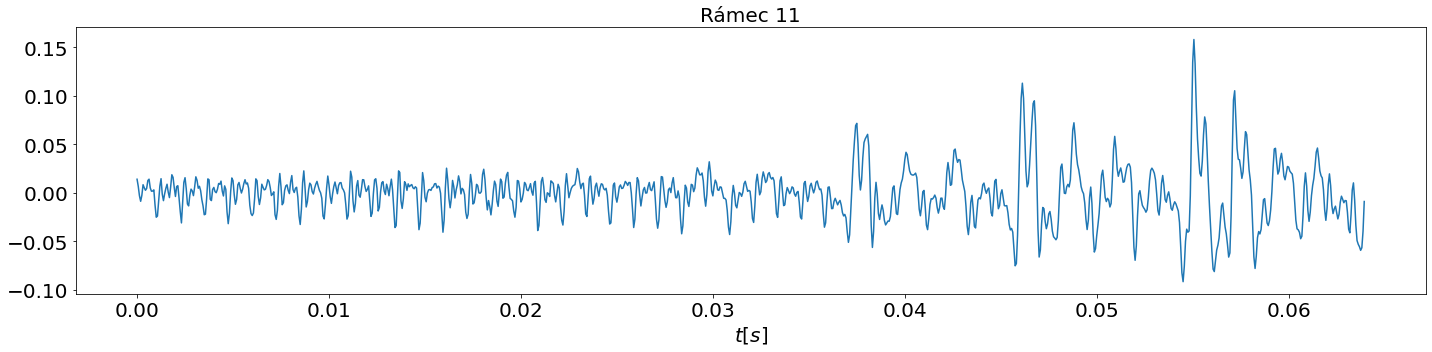

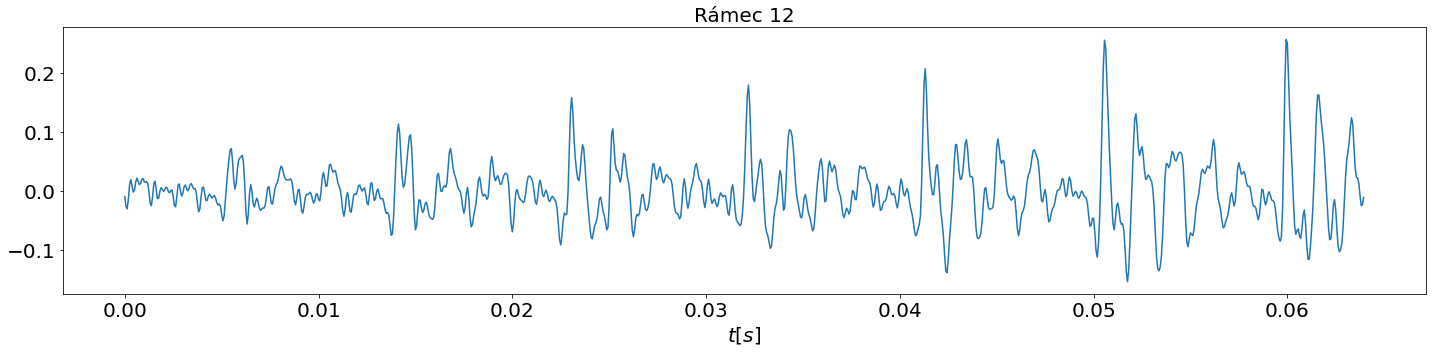

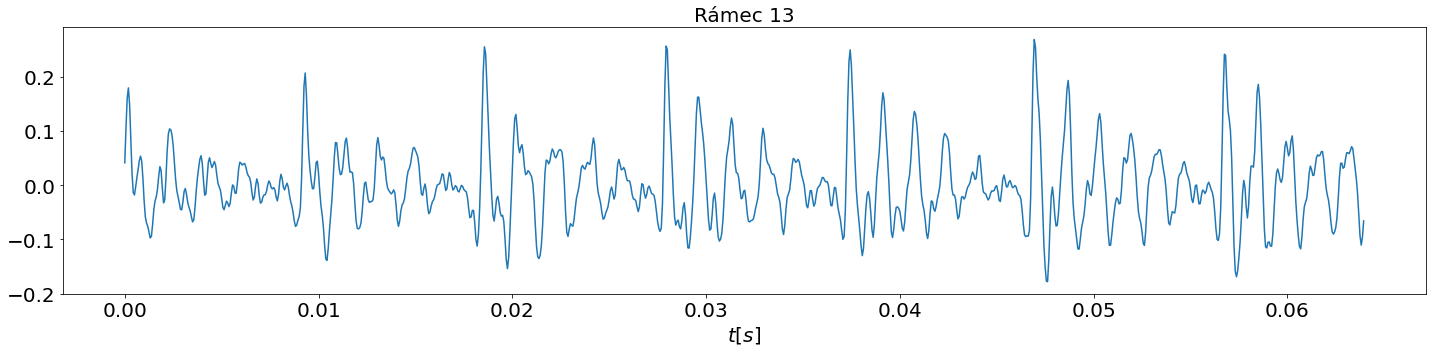

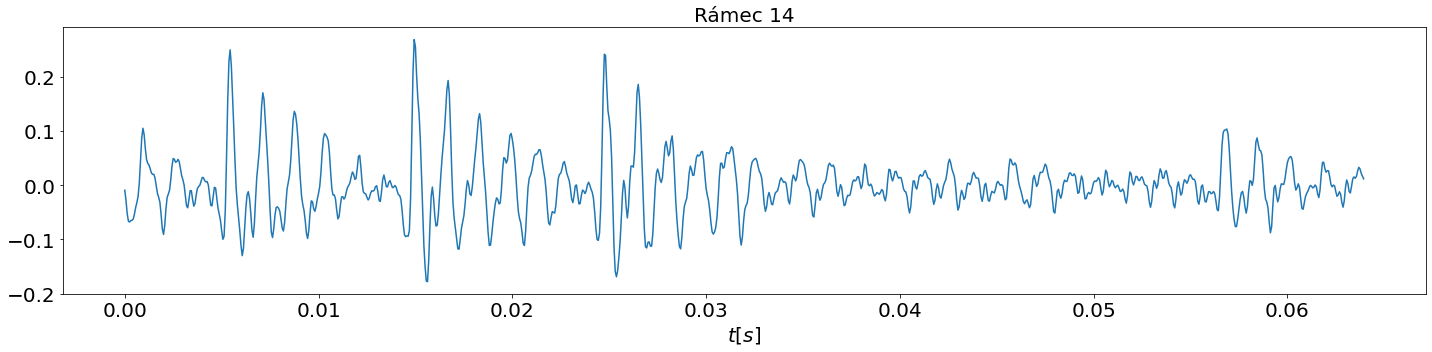

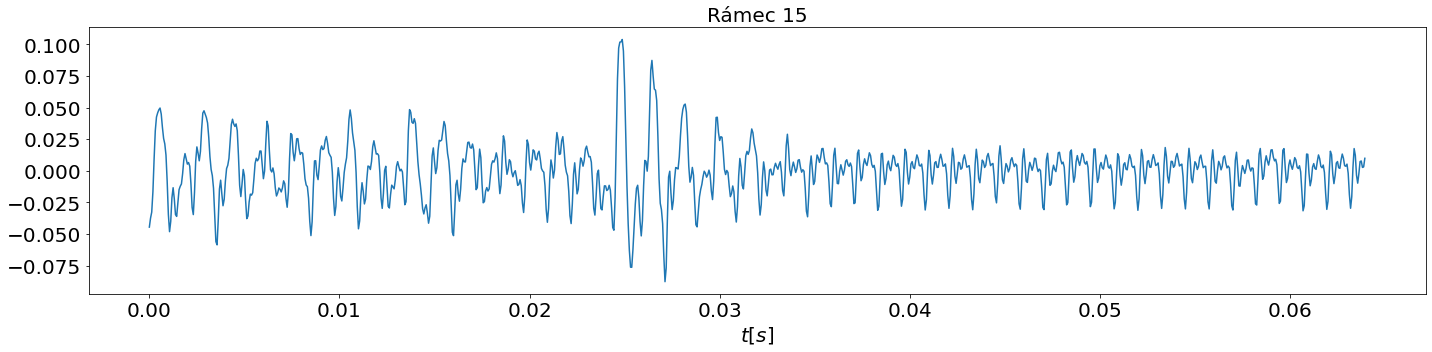

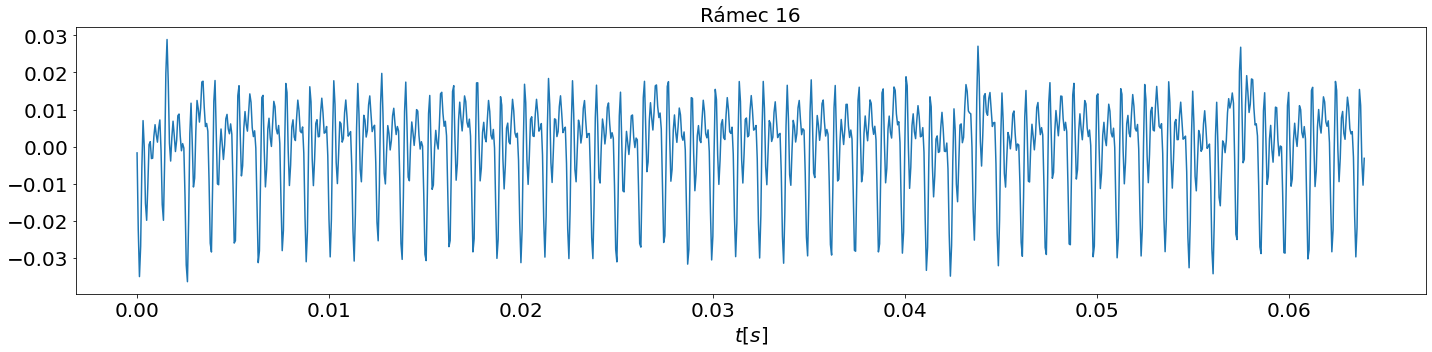

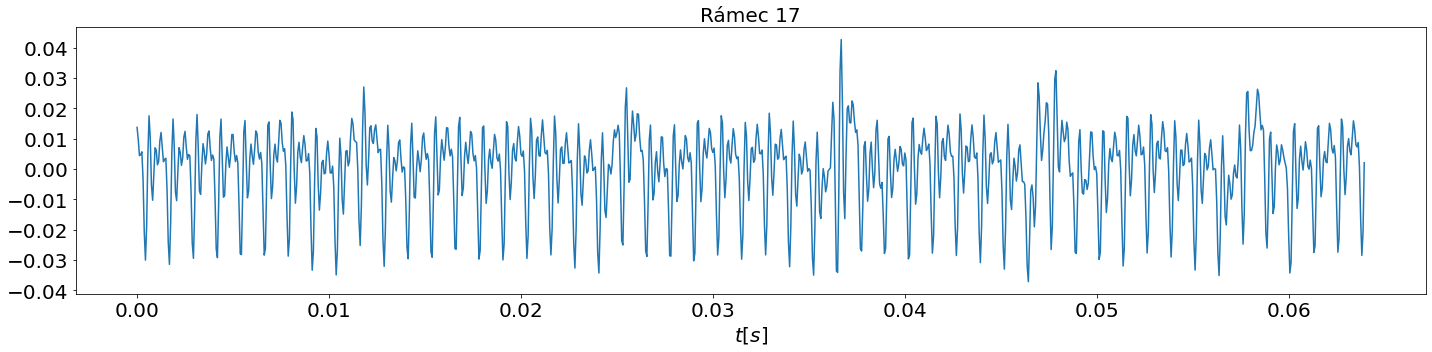

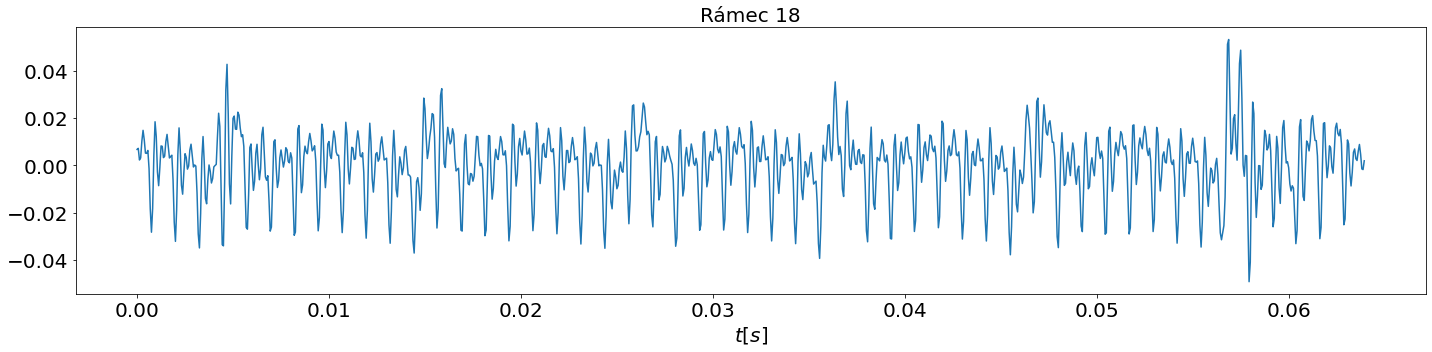

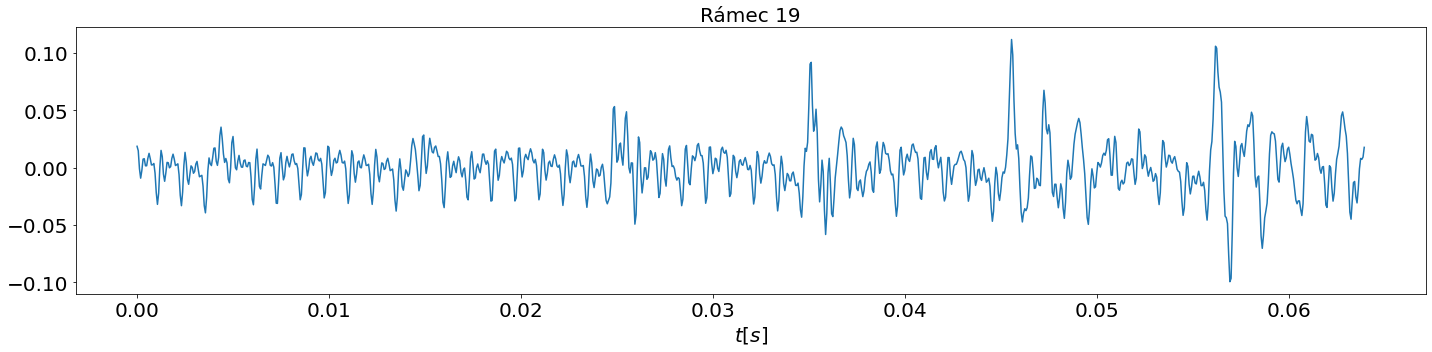

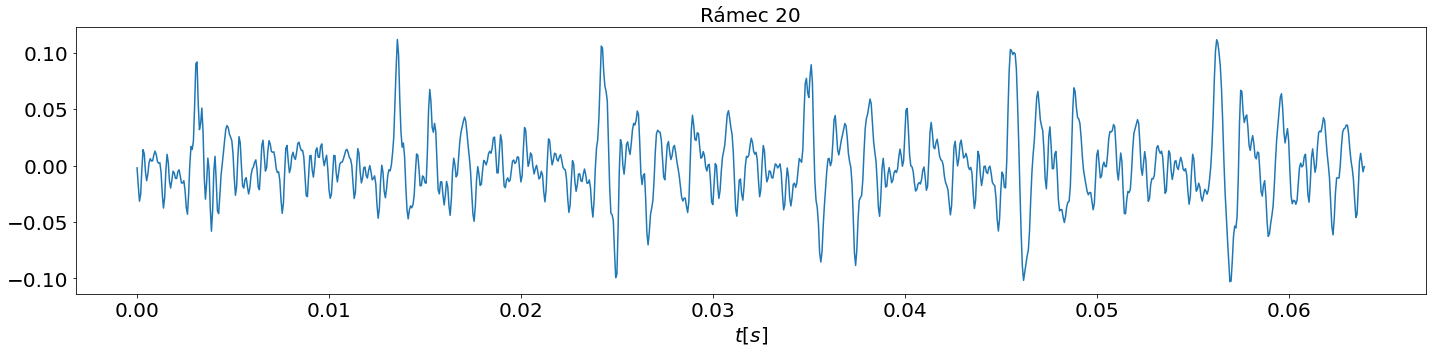

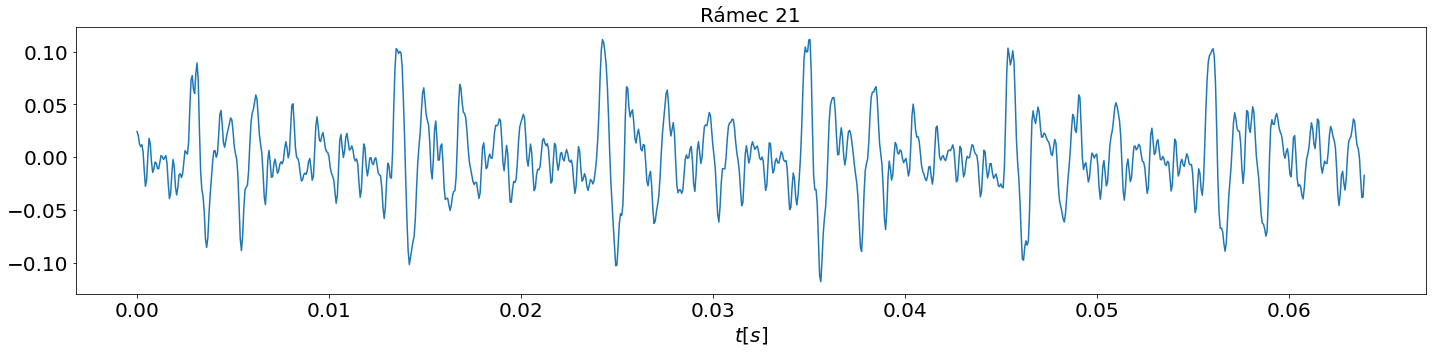

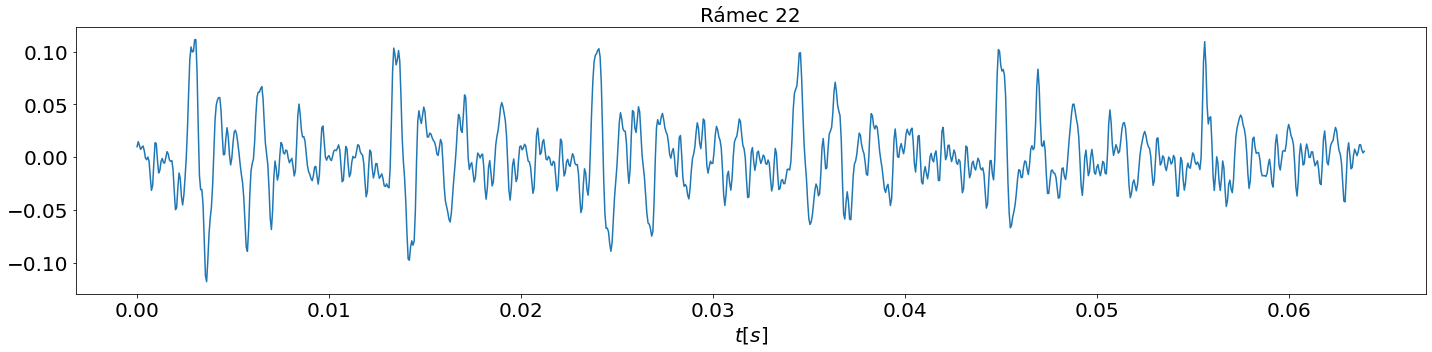

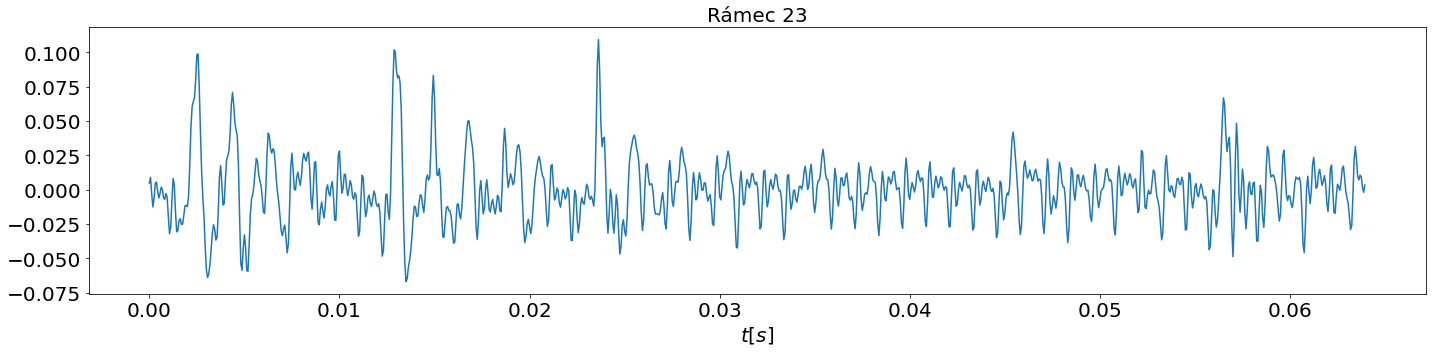

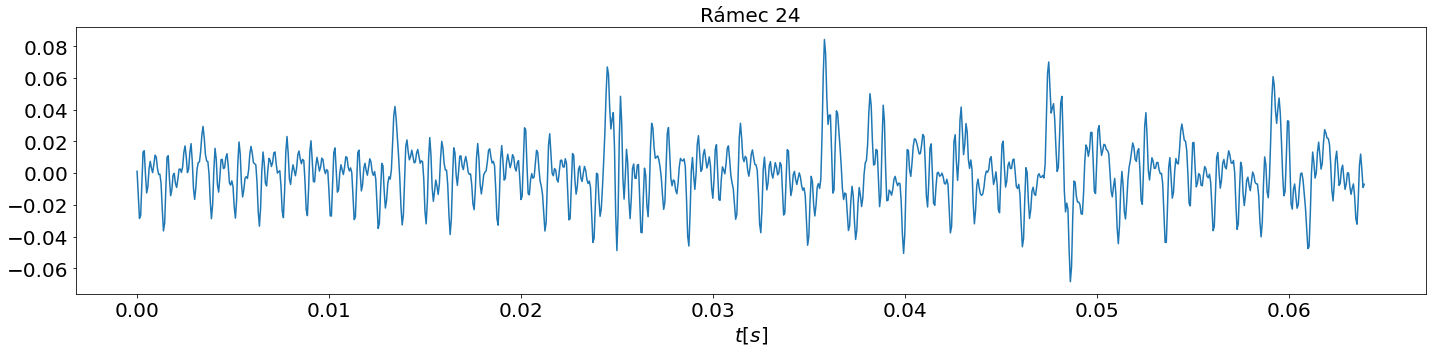

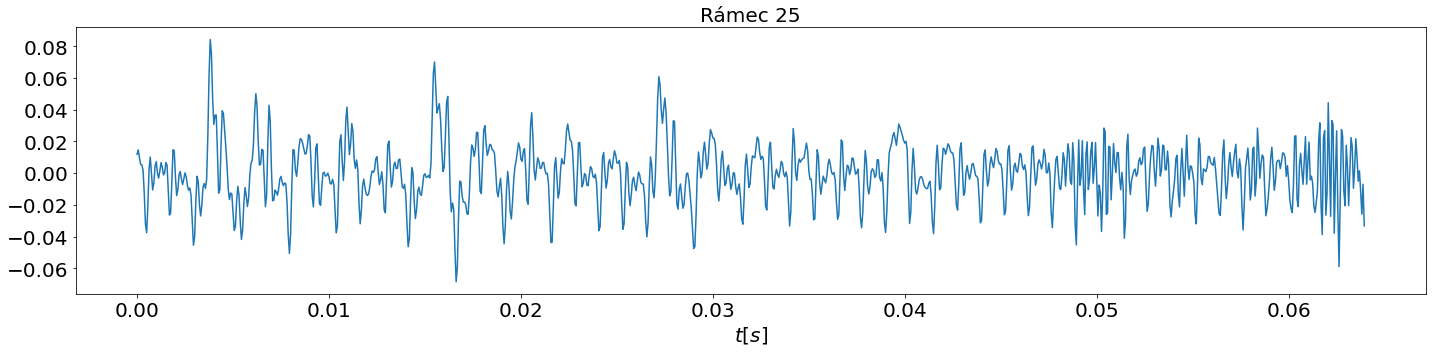

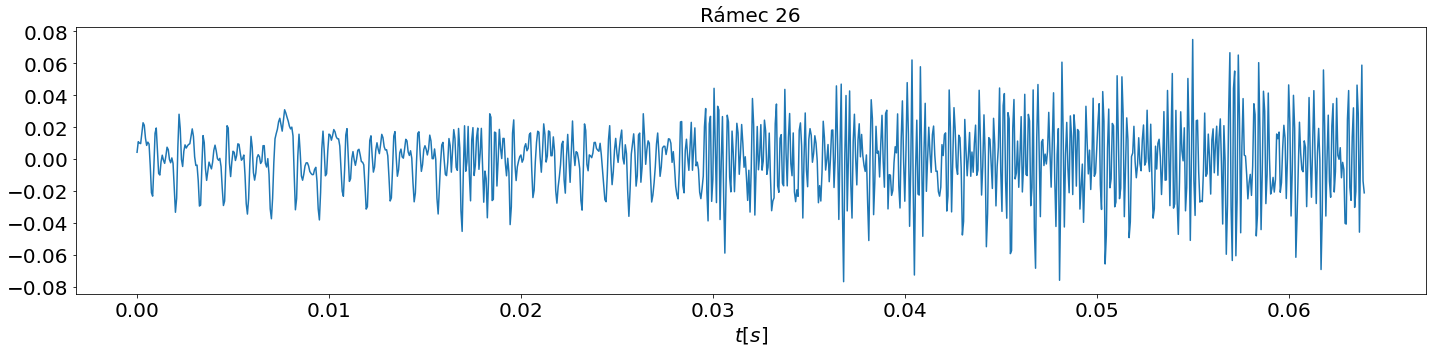

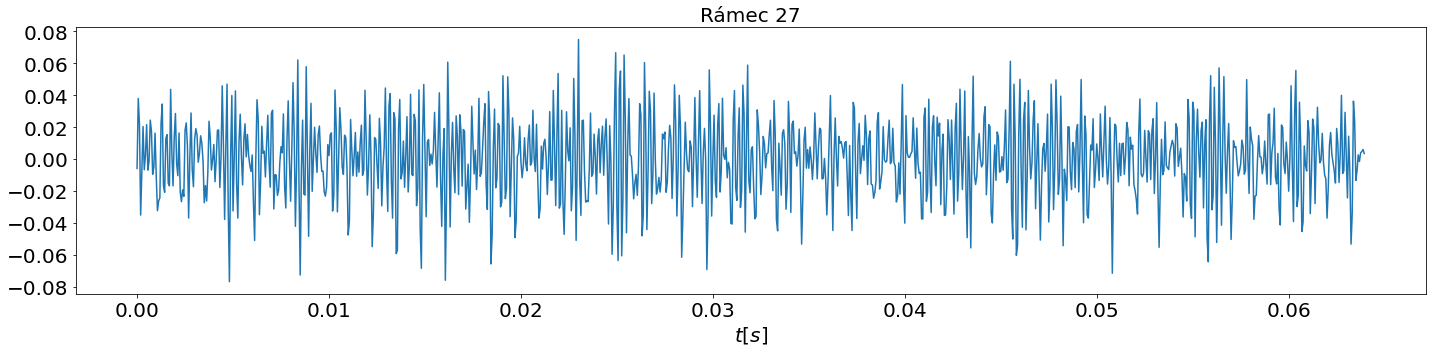

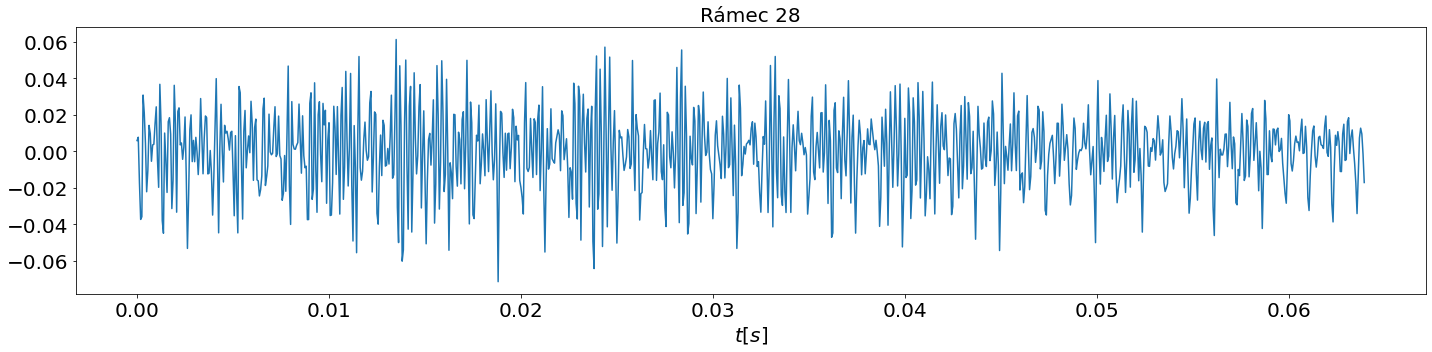

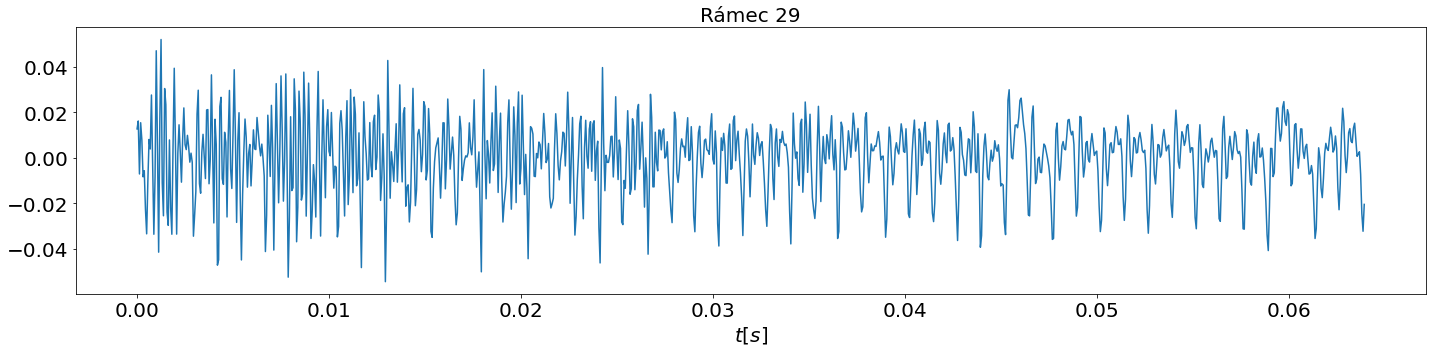

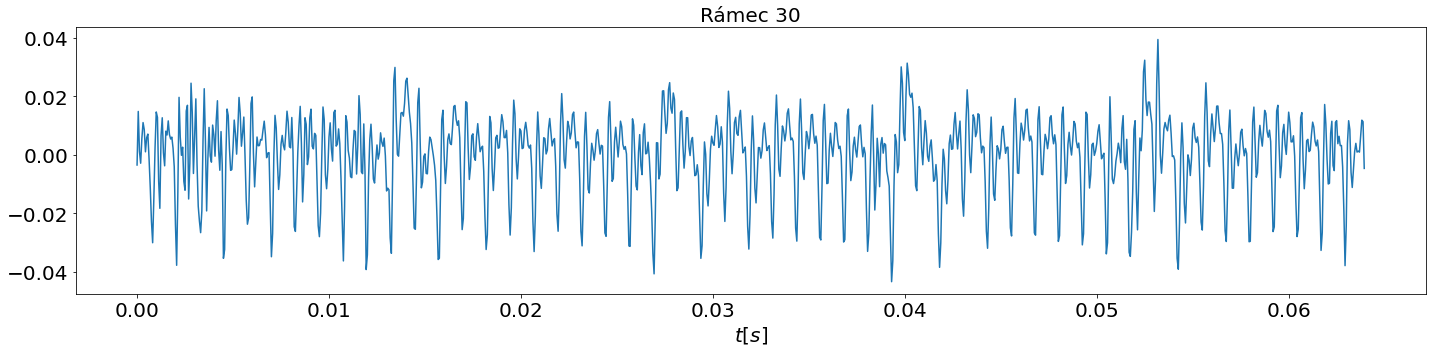

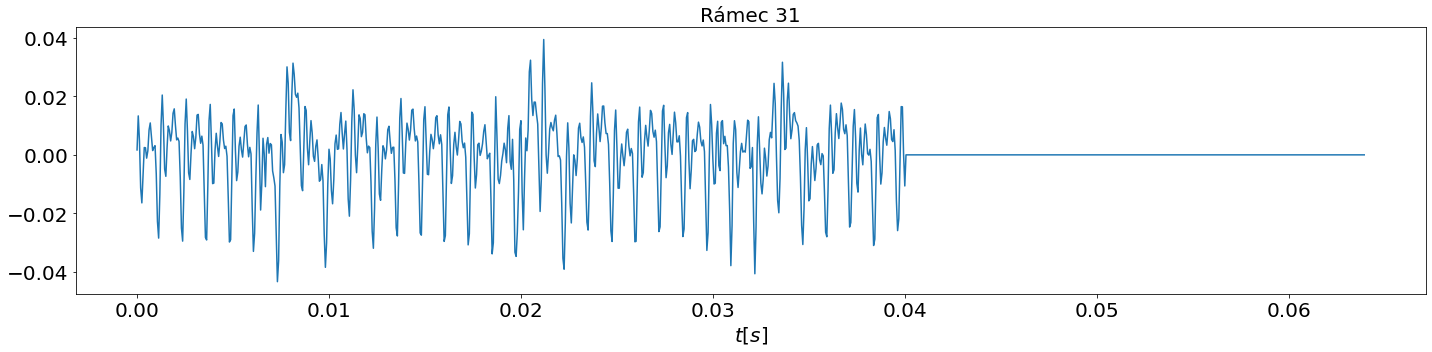

In [3]:
fs, s = wavfile.read("xvinto00.wav")
avg = sum(s)/s.size
s = s - avg
s = s/(2**15)


a = np.zeros((1024,31))
b = 0
c = True



while(c):
    for i in range(1024):
        if(b*512+i > fs):
            c = False
            break
        a[i][b] = s[b*512+i]
    b += 1

tmp = a.transpose()
abc = np.arange(1024)/fs

for i in range(31):
    plt.figure(figsize=(20,5))
    plt.plot(abc, tmp[i])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.gca().set_xlabel('$t[s]$', fontsize=20)
    plt.gca().set_title("Rámec {}".format(i+1), fontsize=20)
    plt.tight_layout()

    


Úkol 3

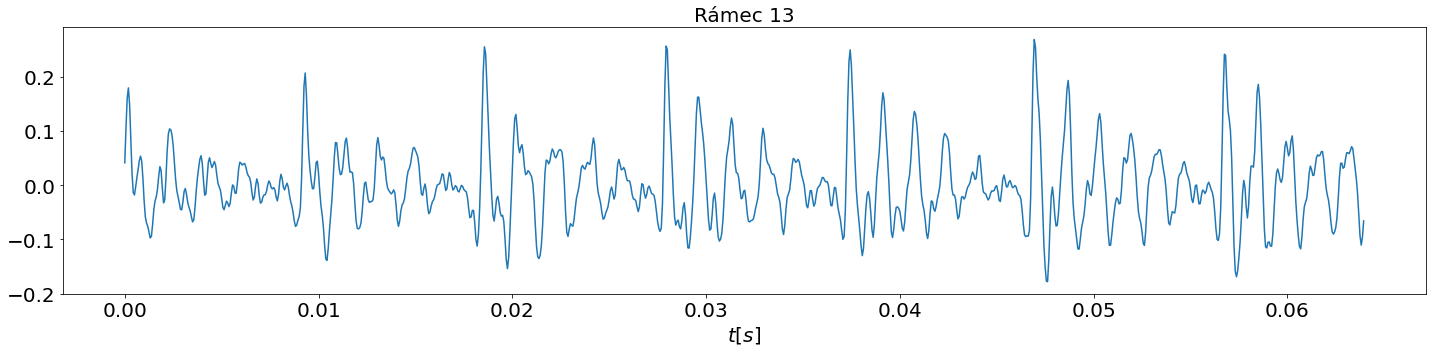

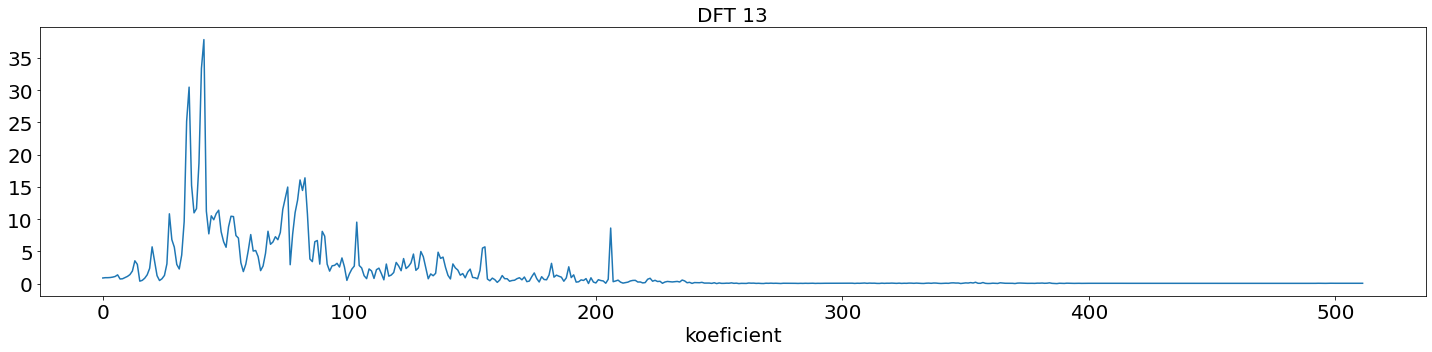

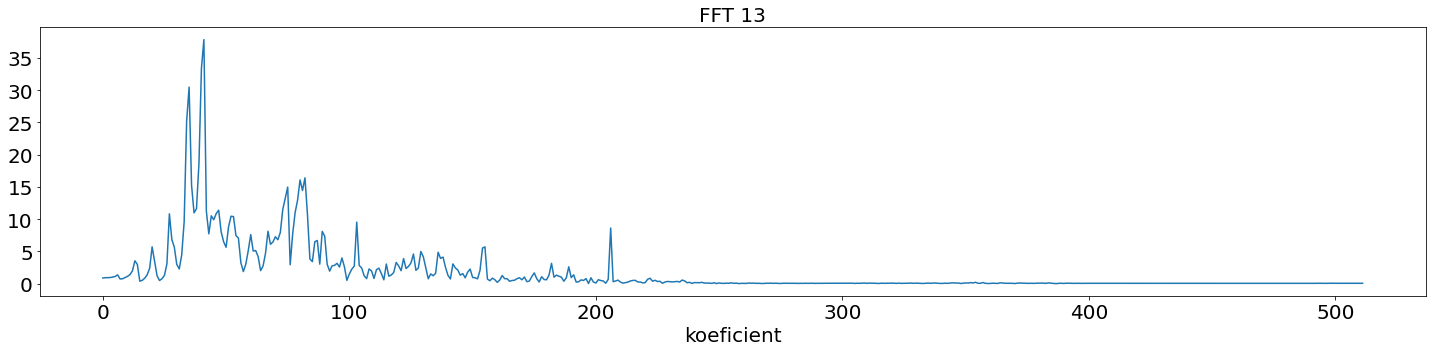

In [4]:
chosen_frame = 13


dft_res = np.zeros(1024, dtype=np.complex_)
for i in range(512):
    for ii in range(1024):
        dft_res[i] += tmp[chosen_frame-1][ii]*(np.cos((-2*np.pi*i*ii)/1024)+np.sin((-2*np.pi*i*ii)/1024)*1j)
        
plt.figure(figsize=(20,5))
plt.plot(abc, tmp[chosen_frame-1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().set_xlabel('$t[s]$', fontsize=20)
plt.gca().set_title("Rámec {}".format(chosen_frame), fontsize=20)
plt.tight_layout()

plt.figure(figsize=(20,5))
plt.plot(np.arange(512), np.abs(dft_res[0:512])*2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().set_xlabel('koeficient', fontsize=20)
plt.gca().set_title("DFT {}".format(chosen_frame), fontsize=20)
plt.tight_layout()

fft_res = np.fft.fft(tmp[chosen_frame-1])
plt.figure(figsize=(20,5))
plt.plot(np.arange(512), np.abs(fft_res[0:512])*2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().set_xlabel('koeficient', fontsize=20)
plt.gca().set_title("FFT {}".format(chosen_frame), fontsize=20)
plt.tight_layout()

for i in range(31):
    break
    chosen_frame = i+1
    plt.figure(figsize=(20,4))
    plt.plot(abc, tmp[chosen_frame-1])
    plt.gca().set_xlabel('$t[s]$')
    plt.gca().set_title("Rámec {}".format(chosen_frame))
    plt.tight_layout()
    fft_res = np.fft.fft(tmp[chosen_frame-1])
    plt.figure(figsize=(20,4))
    plt.plot(np.arange(512), np.abs(fft_res[0:512])*2)
    plt.gca().set_xlabel('koeficient')
    plt.gca().set_title("DFT {}".format(chosen_frame))
    plt.tight_layout()
    
chosen_frame = 13


Úkol 4

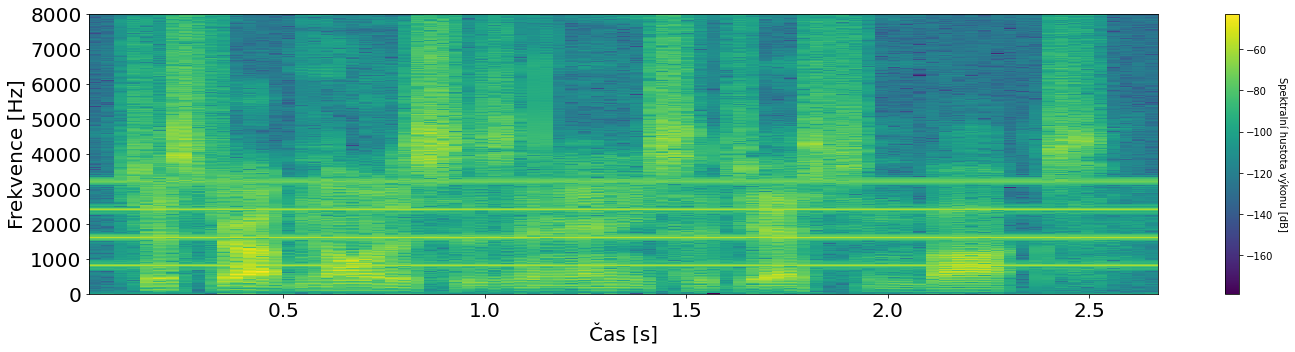

In [5]:
f, t, sgr = spectrogram(s, fs, nperseg=1024,noverlap=512)
sgr_log = 10 * np.log10(sgr+1e-20)


plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]', fontsize=20)
plt.gca().set_ylabel('Frekvence [Hz]', fontsize=20)
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()



Úkol 6

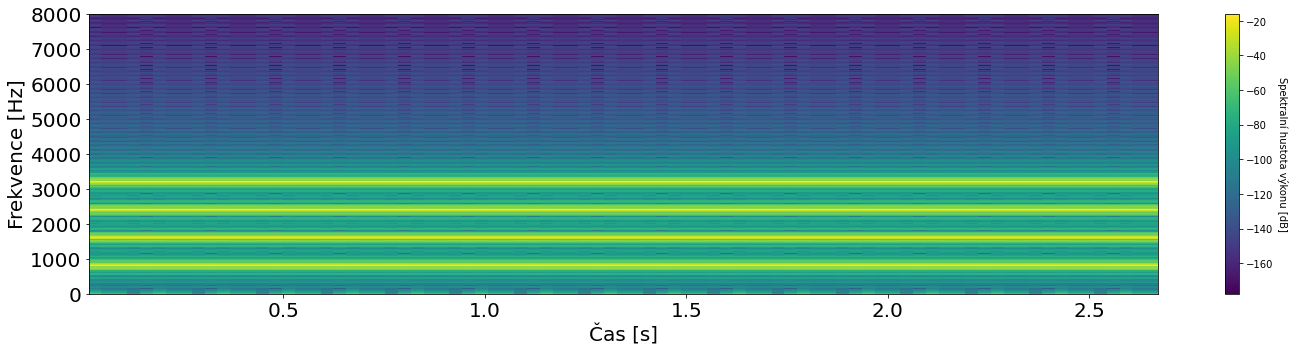

In [6]:
f1 = 800
f2 = 1600
f3 = 2400
f4 = 3200

samples = np.arange(fs*sf.info("xvinto00.wav").duration)/(fs)
cos1 = np.cos(2*np.pi*f1*samples)
cos2 = np.cos(2*np.pi*f2*samples)
cos3 = np.cos(2*np.pi*f3*samples)
cos4 = np.cos(2*np.pi*f4*samples)
cos_all = cos1+cos2+cos3+cos4
sf.write('4cos.wav', cos_all, fs)
f, t, sgr = spectrogram(cos_all, fs, nperseg=1024,noverlap=512)
sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]', fontsize=20)
plt.gca().set_ylabel('Frekvence [Hz]', fontsize=20)
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()


Úkol 7

b1: 0.907, -8.625, 37.349, -96.924, 166.885, -199.185, 166.885, -96.924, 37.349, -8.625, 0.907, 
a1: 1.000, -9.325, 39.592, -100.744, 170.091, -199.075, 163.567, -93.163, 35.209, -7.975, 0.822, 
b2: 0.905, -7.322, 28.222, -67.634, 111.165, -130.664, 111.165, -67.634, 28.222, -7.322, 0.905, 
a2: 1.000, -7.929, 29.952, -70.353, 113.339, -130.582, 108.903, -64.954, 26.571, -6.759, 0.819, 
b3: 0.904, -5.315, 17.019, -35.955, 55.174, -63.311, 55.174, -35.955, 17.019, -5.315, 0.904, 
a3: 1.000, -5.760, 18.071, -37.410, 56.256, -63.263, 54.036, -34.516, 16.015, -4.903, 0.818, 
b4: 0.904, -2.793, 7.971, -13.306, 20.055, -21.108, 20.055, -13.306, 7.971, -2.793, 0.904, 
a4: 1.000, -3.028, 8.465, -13.845, 20.446, -21.088, 19.635, -12.769, 7.497, -2.575, 0.817, 

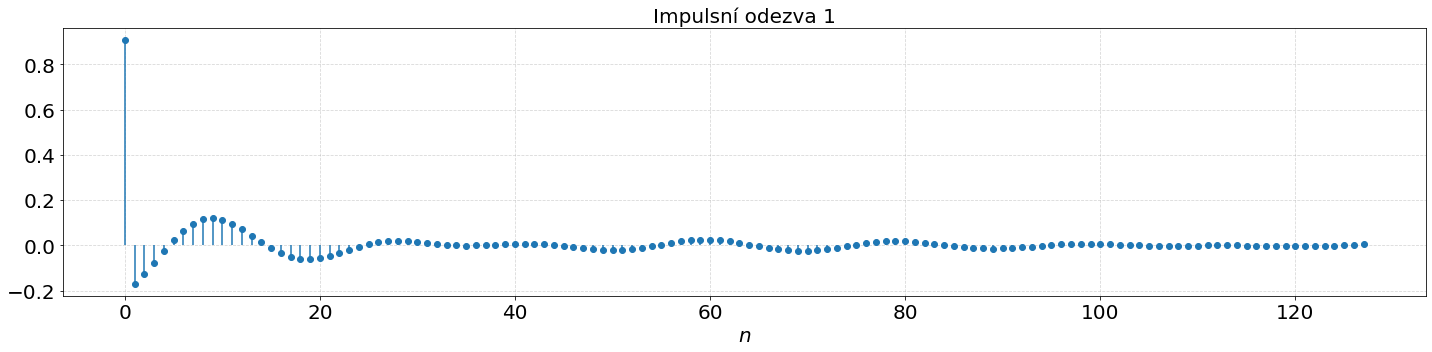

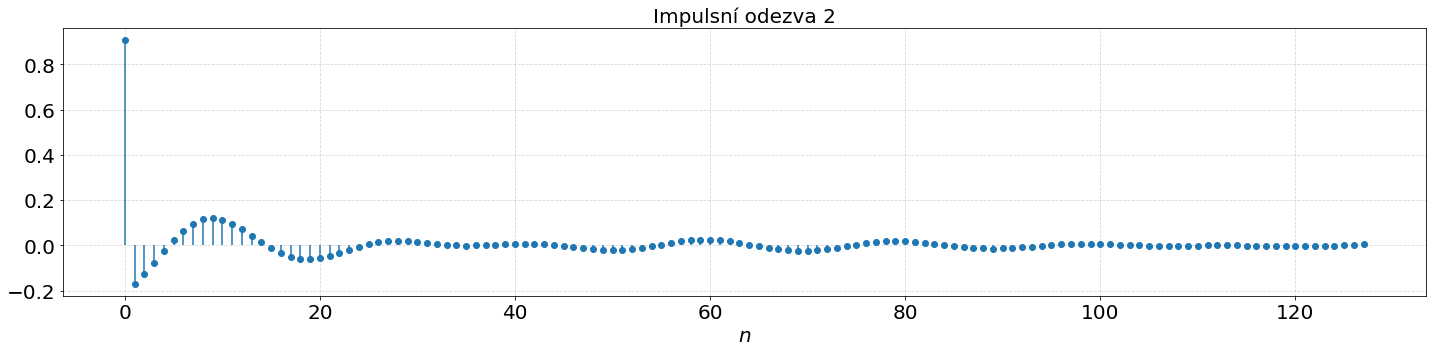

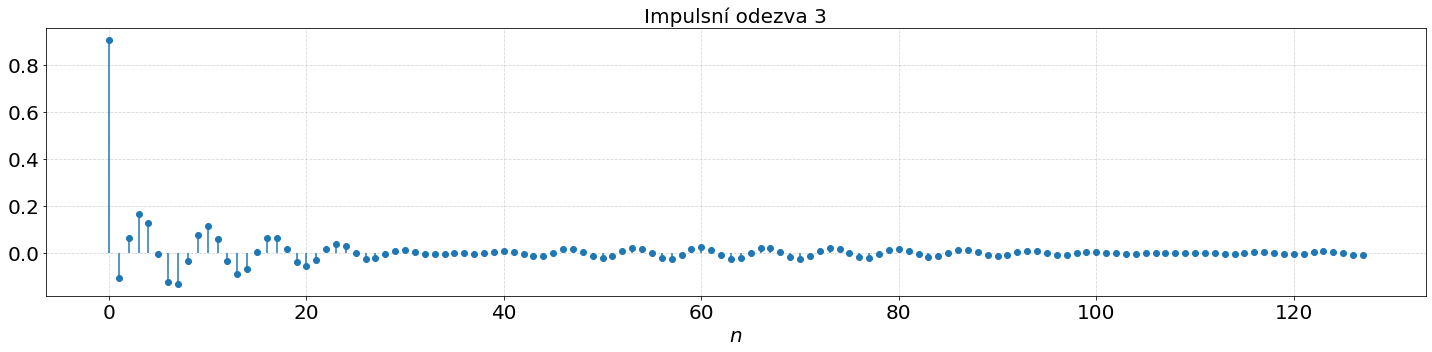

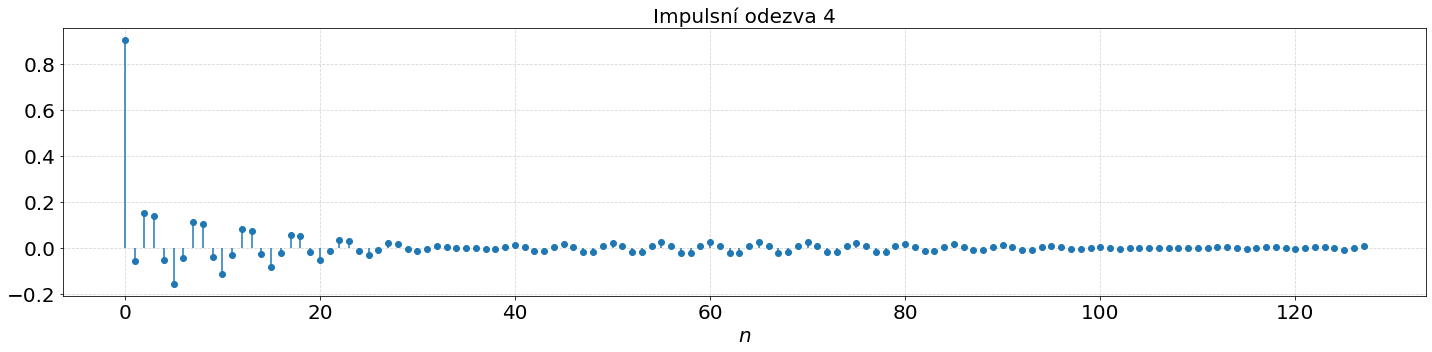

In [7]:
spread1 = 80
spread2 = 30
bpass = 3
bstop = 40
N, Wn = signal.buttord([(f1-spread1)/(fs/2),(f1+spread1)/(fs/2)],[(f1-spread2)/(fs/2),(f1+spread2)/(fs/2)], bpass, bstop)
b1, a1 = signal.butter(N, Wn, 'bandstop')

#print(b1)
#print(a1)

print("b1: ", end="")
for i in b1:
    print("{:.3f}".format(i), end = ", ")
print("\na1: ", end="")
for i in a1:
    print("{:.3f}".format(i), end = ", ")
N_imp = 128
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h1 = lfilter(b1, a1, imp)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.stem(np.arange(N_imp), h1, basefmt=' ')
plt.gca().set_xlabel('$n$', fontsize=20)
plt.gca().set_title('Impulsní odezva 1', fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

N, Wn = signal.buttord([(f2-spread1)/(fs/2),(f2+spread1)/(fs/2)],[(f2-spread2)/(fs/2),(f2+spread2)/(fs/2)], bpass, bstop)
b2, a2 = signal.butter(N, Wn, 'bandstop')

#print(b2)
#print(a2)
print("\nb2: ", end="")
for i in b2:
    print("{:.3f}".format(i), end = ", ")
print("\na2: ", end="")
for i in a2:
    print("{:.3f}".format(i), end = ", ")
h2 = lfilter(b2, a2, imp)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.stem(np.arange(N_imp), h1, basefmt=' ')
plt.gca().set_xlabel('$n$', fontsize=20)
plt.gca().set_title('Impulsní odezva 2', fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

N, Wn = signal.buttord([(f3-spread1)/(fs/2),(f3+spread1)/(fs/2)],[(f3-spread2)/(fs/2),(f3+spread2)/(fs/2)], bpass, bstop)
b3, a3 = signal.butter(N, Wn, 'bandstop')

#print(b3)
#print(a3)
print("\nb3: ", end="")
for i in b3:
    print("{:.3f}".format(i), end = ", ")
print("\na3: ", end="")
for i in a3:
    print("{:.3f}".format(i), end = ", ")

h3 = lfilter(b3, a3, imp)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.stem(np.arange(N_imp), h3, basefmt=' ')
plt.gca().set_xlabel('$n$', fontsize=20)
plt.gca().set_title('Impulsní odezva 3', fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

N, Wn = signal.buttord([(f4-spread1)/(fs/2),(f4+spread1)/(fs/2)],[(f4-spread2)/(fs/2),(f4+spread2)/(fs/2)], bpass, bstop)
b4, a4 = signal.butter(N, Wn, 'bandstop')

#print(b4)
#print(a4)
print("\nb4: ", end="")
for i in b4:
    print("{:.3f}".format(i), end = ", ")

print("\na4: ", end="")
for i in a4:
    print("{:.3f}".format(i), end = ", ")

h4 = lfilter(b4, a4, imp)
plt.figure(figsize=(20,5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.stem(np.arange(N_imp), h4, basefmt=' ')
plt.gca().set_xlabel('$n$', fontsize=20)
plt.gca().set_title('Impulsní odezva 4', fontsize=20)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

Úkol 8

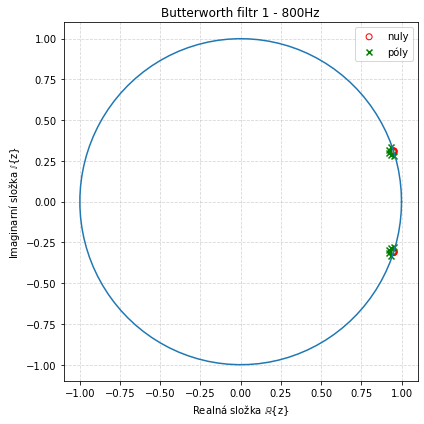

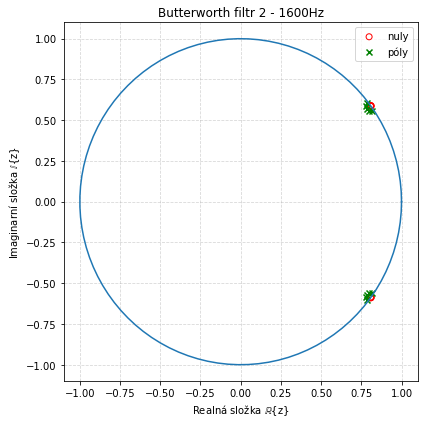

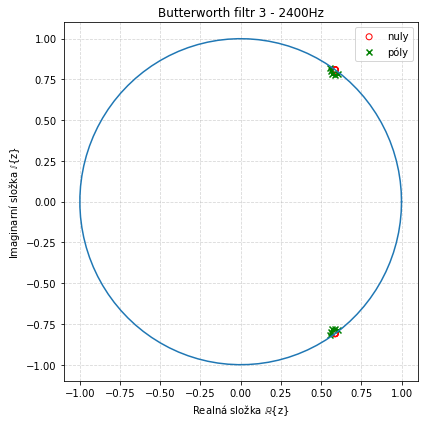

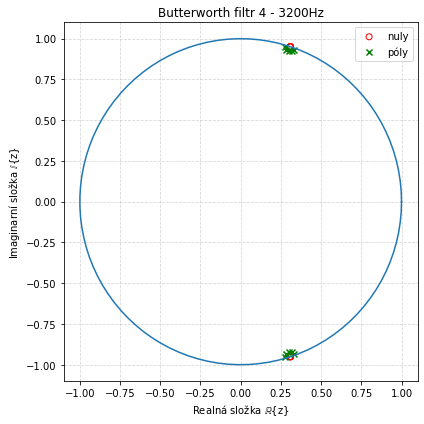

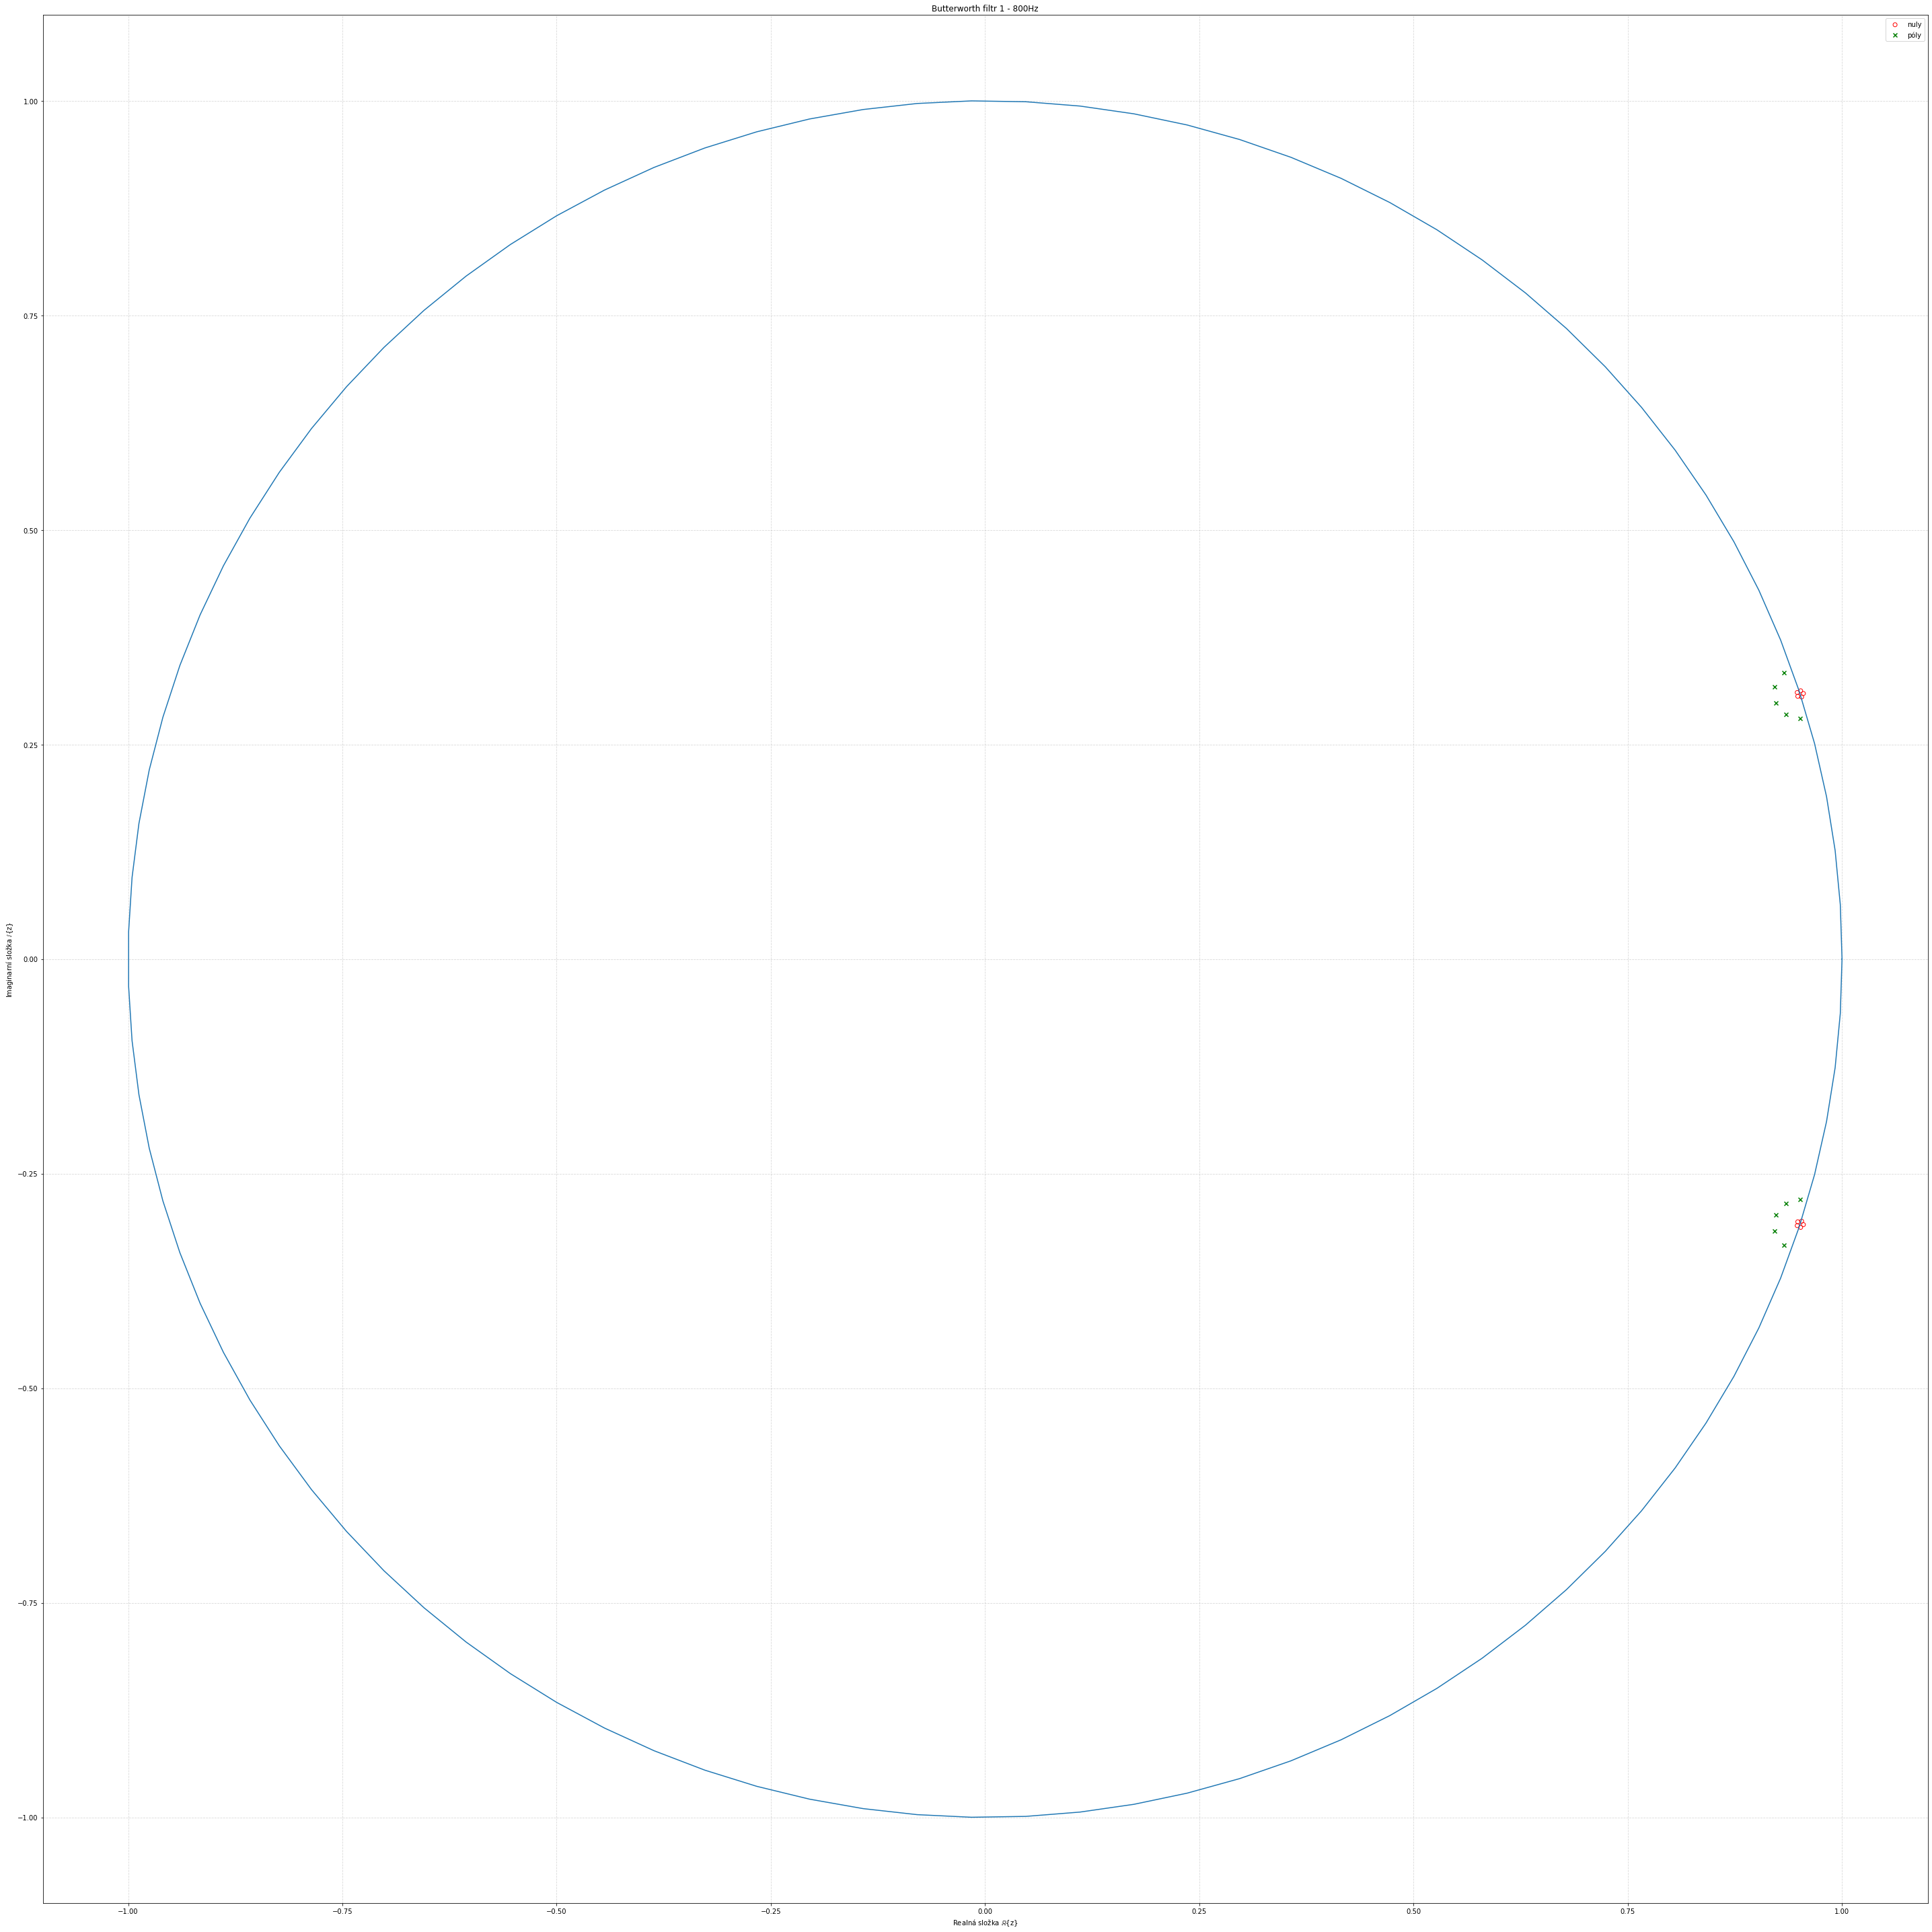

In [8]:
z1, p1, _ = tf2zpk(b1, a1)
plt.figure(figsize=(6,6))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='g', label='póly')
plt.gca().set_title('Butterworth filtr 1 - 800Hz')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
#-------------------------------
z2, p2, _ = tf2zpk(b2, a2)
plt.figure(figsize=(6,6))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
plt.scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p2), np.imag(p2), marker='x', color='g', label='póly')
plt.gca().set_title('Butterworth filtr 2 - 1600Hz')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
#-------------------------------
z3, p3, _ = tf2zpk(b3, a3)
plt.figure(figsize=(6,6))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
plt.scatter(np.real(z3), np.imag(z3), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p3), np.imag(p3), marker='x', color='g', label='póly')
plt.gca().set_title('Butterworth filtr 3 - 2400Hz')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()
#-------------------------------
z4, p4, _ = tf2zpk(b4, a4)
plt.figure(figsize=(6,6))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
plt.scatter(np.real(z4), np.imag(z4), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p4), np.imag(p4), marker='x', color='g', label='póly')
plt.gca().set_title('Butterworth filtr 4 - 3200Hz')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()

z1, p1, _ = tf2zpk(b1, a1)
plt.figure(figsize=(40,40))
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='g', label='póly')
plt.gca().set_title('Butterworth filtr 1 - 800Hz')
plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')
plt.tight_layout()


Úkol 9

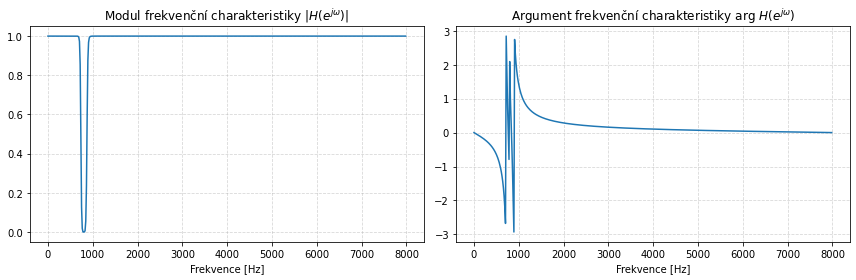

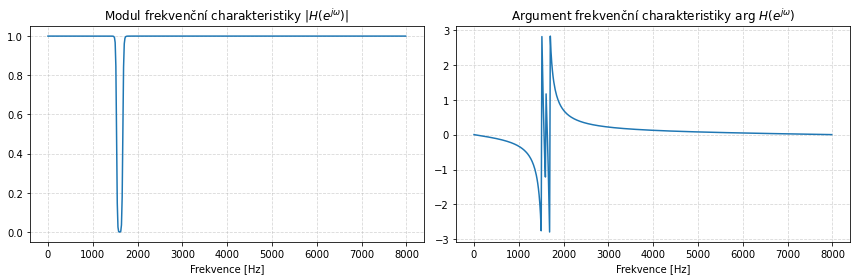

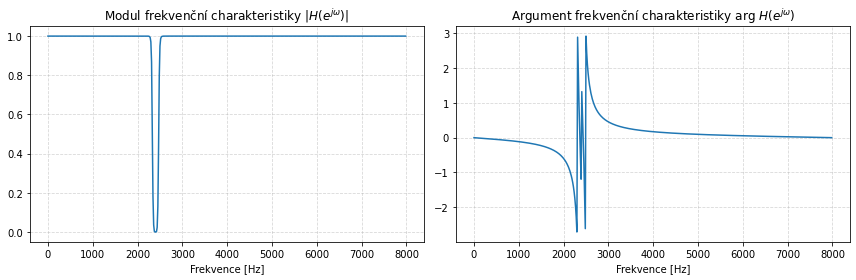

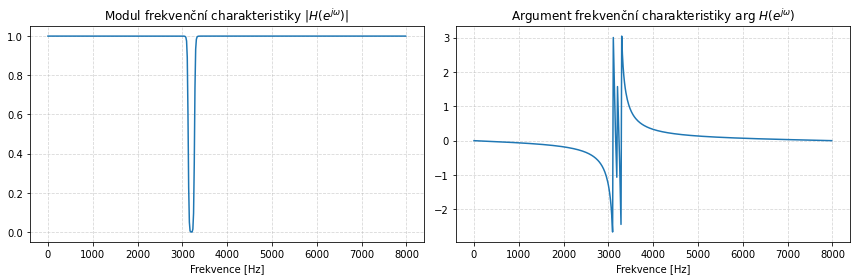

In [9]:
w1, H1 = freqz(b1, a1)
_, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(w1 / 2 / np.pi * fs, np.abs(H1))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w1 / 2 / np.pi * fs, np.angle(H1))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
#-----------------------------
w2, H2 = freqz(b2, a2)
_, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(w2 / 2 / np.pi * fs, np.abs(H2))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w2 / 2 / np.pi * fs, np.angle(H2))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
#-----------------------------
w3, H3 = freqz(b3, a3)
_, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(w3 / 2 / np.pi * fs, np.abs(H3))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w3 / 2 / np.pi * fs, np.angle(H3))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
#-----------------------------
w4, H4 = freqz(b4, a4)
_, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(w4 / 2 / np.pi * fs, np.abs(H4))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')
ax[1].plot(w4 / 2 / np.pi * fs, np.angle(H4))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')
for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

Úkol 10

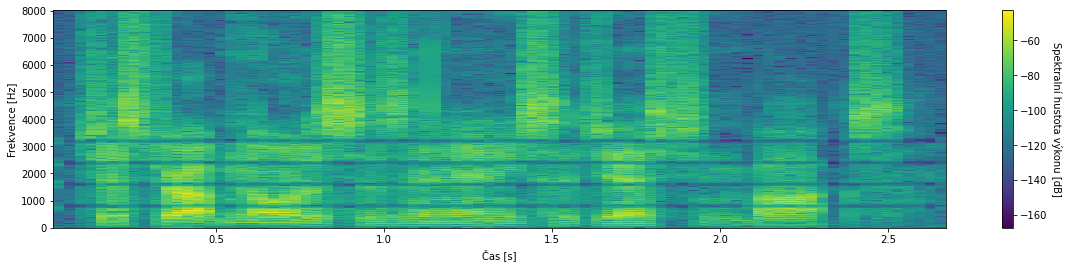

In [10]:
out = signal.filtfilt(b1, a1, s)
out = signal.filtfilt(b2, a2, out)
out = signal.filtfilt(b3, a3, out)
out = signal.filtfilt(b4, a4, out)
f, t, sgr = spectrogram(out, fs, nperseg=1024,noverlap=512)
sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(20,4))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
sf.write('clean_bandstop.wav', out, fs)